In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

In [ ]:
# https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy

## Importing libraries

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf
tf.random.set_seed(221)

In [ ]:
CLASSES = ['PNEUMONIA', 'NORMAL']
IMAGE_SIZE = 256
path = 'chest-xray-pneumonia/chest_xray/chest_xray/'
subfolder = ['train','test','val']

## Class distribution

In [ ]:
no_of_pneumonia=[]
no_of_normal=[]
for i in subfolder:
  no_of_pneumonia.append(len(os.listdir(os.path.join(path,i,CLASSES[0]))))
  no_of_normal.append(len(os.listdir(os.path.join(path,i,CLASSES[1]))))

In [ ]:
no_of_pneumonia, no_of_normal

([3876, 390, 9], [1342, 234, 9])

In [ ]:
def plot_pie_chart(data, keys, title):
  plt.pie(data, labels=keys, autopct='%.0f%%')
  plt.title("Class distribution for "+title+" dataset")
  plt.show()

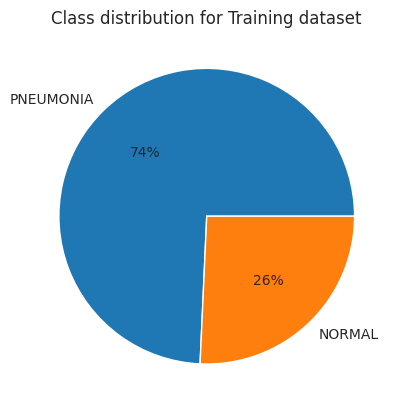

In [ ]:
data = [no_of_pneumonia[subfolder.index('train')],no_of_normal[subfolder.index('train')]]
plot_pie_chart(data, CLASSES, "Training")

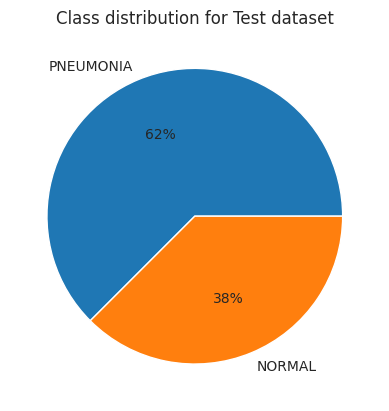

In [ ]:
data = [no_of_pneumonia[subfolder.index('test')],no_of_normal[subfolder.index('test')]]
plot_pie_chart(data, CLASSES, "Test")

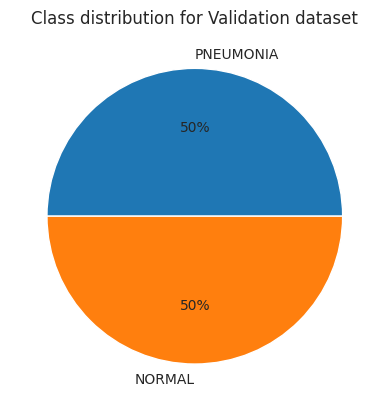

In [ ]:
data = [no_of_pneumonia[subfolder.index('val')],no_of_normal[subfolder.index('val')]]
plot_pie_chart(data, CLASSES, "Validation")

##Data loading

In [ ]:
def get_data(path, subfolder):
  data=[]
  features=[]
  target=[]
  image_path = os.path.join(path,subfolder, CLASSES[0])
  images = [img for img in os.listdir(image_path) if img.endswith(".jpeg")]
  for i in images:
    img = cv2.imread(os.path.join(image_path,i), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    features.append(img)
    target.append(0)

  image_path = os.path.join(path,subfolder, CLASSES[1])
  images = [img for img in os.listdir(image_path) if img.endswith(".jpeg")]
  for i in images:
    img = cv2.imread(os.path.join(image_path,i), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    features.append(img)
    target.append(1)
  data=[features, target]
  return data

In [ ]:
train_data = get_data(path, subfolder[0])
test_data = get_data(path, subfolder[1])
val_data = get_data(path, subfolder[2])

##Visualisation of data

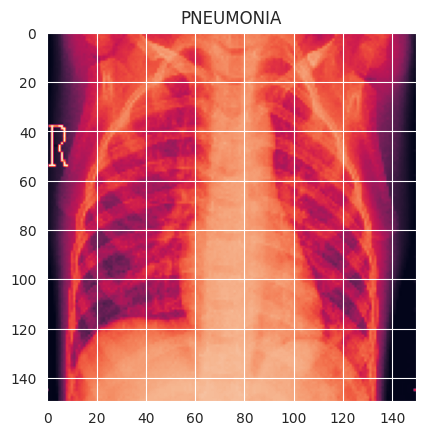

In [ ]:
plt.title(val_data[1][0])
plt.imshow(val_data[0][0])

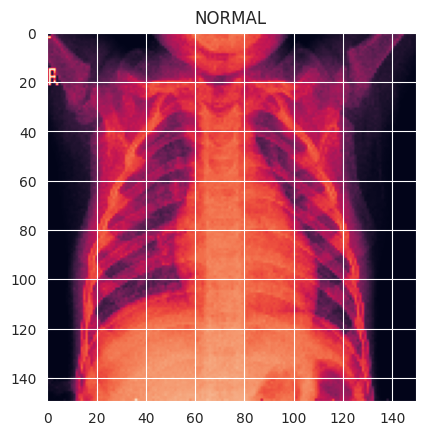

In [ ]:
plt.title(val_data[1][10])
plt.imshow(val_data[0][10])

## Preparing data

In [ ]:
X_train, y_train  = train_data[0], train_data[1]
X_test, y_test  = test_data[0], test_data[1]
X_val, y_val = val_data[0], val_data[1]

In [ ]:
# Normalize the data
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
X_val = np.array(X_val) / 255

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [ ]:
# resize data for deep learning
X_train = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_val = X_val.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

##Preparing deep learning model for classification

In [ ]:
# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='leaky_relu'),
    Dropout(0.5),
    Dense(128, activation='leaky_relu'),
    Dropout(0.5),
    Dense(16, activation="leaky_relu"),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data = (X_test, y_test), batch_size=32)

Epoch 1/50
163/163 [==============================] - 16s 73ms/step - loss: 2.2605 - accuracy: 0.8660 - val_loss: 135.2018 - val_accuracy: 0.6250
Epoch 2/50
163/163 [==============================] - 11s 69ms/step - loss: 1.2384 - accuracy: 0.9156 - val_loss: 23.5129 - val_accuracy: 0.6250
Epoch 3/50
163/163 [==============================] - 12s 71ms/step - loss: 0.7477 - accuracy: 0.9314 - val_loss: 17.1229 - val_accuracy: 0.6330
Epoch 4/50
163/163 [==============================] - 11s 70ms/step - loss: 0.5098 - accuracy: 0.9454 - val_loss: 6.8404 - val_accuracy: 0.7564
Epoch 5/50
163/163 [==============================] - 12s 72ms/step - loss: 0.4552 - accuracy: 0.9471 - val_loss: 44.4692 - val_accuracy: 0.6330
Epoch 6/50
163/163 [==============================] - 12s 72ms/step - loss: 0.3174 - accuracy: 0.9592 - val_loss: 3.4447 - val_accuracy: 0.8381
Epoch 7/50
163/163 [==============================] - 12s 71ms/step - loss: 0.2079 - accuracy: 0.9693 - val_loss: 14.2220 - val_acc

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 27ms/step - loss: 6.2390 - accuracy: 0.7997
Loss of the model is -  6.239045143127441
20/20 [==============================] - 0s 20ms/step - loss: 6.2390 - accuracy: 0.7997
Accuracy of the model is -  79.96794581413269 %


##Result and analysis

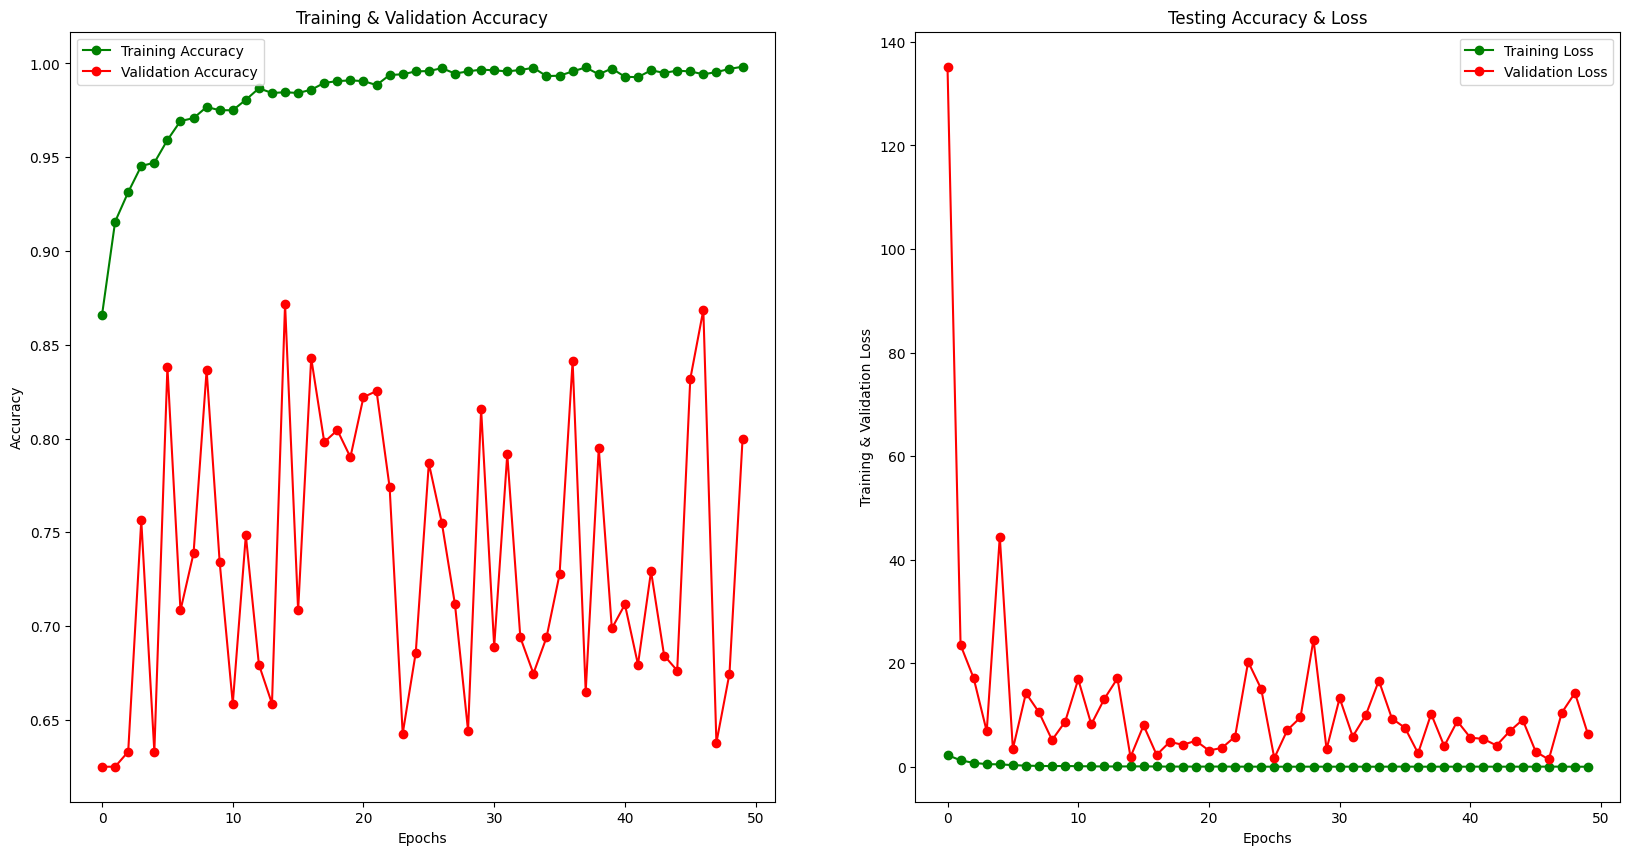

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()